In [1]:
from tensorflow.keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [2]:
train_X.shape

(60000, 28, 28)

In [3]:
test_X.shape

(10000, 28, 28)

In [5]:
X_train = train_X.astype('float')/255
X_test = test_X.astype('float')/255

In [6]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Model = Sequential()
Model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
Model.add(MaxPooling2D(3))
Model.add(Conv2D(16, (3,3), activation = 'relu'))
Model.add(MaxPooling2D(3))
Model.add(Flatten())
Model.add(Dense(32, activation = 'relu'))
Model.add(Dense(10, activation = 'softmax'))

In [31]:
Model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 16)          4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [32]:
Model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [33]:
Model_Histroy = Model.fit(X_train, y_train, epochs = 5, batch_size = 64, validation_split = 0.1, verbose = 0)

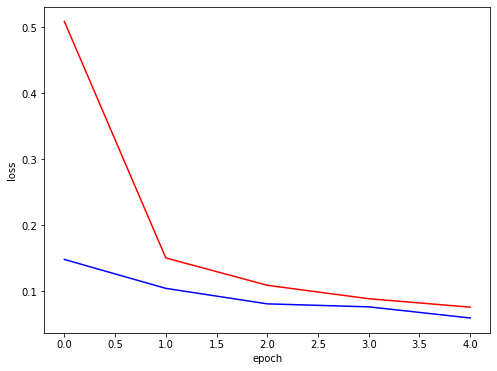

In [35]:
import matplotlib.pyplot as plt

Loss = Model_Histroy.history['loss']
Val_Loss = Model_Histroy.history['val_loss']
Epochs = range(5)

plt.figure(figsize = (8,6))
plt.plot(Epochs, Loss, c = 'red', label = 'Training loss')
plt.plot(Epochs, Val_Loss, c = 'blue', label = 'Validation loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


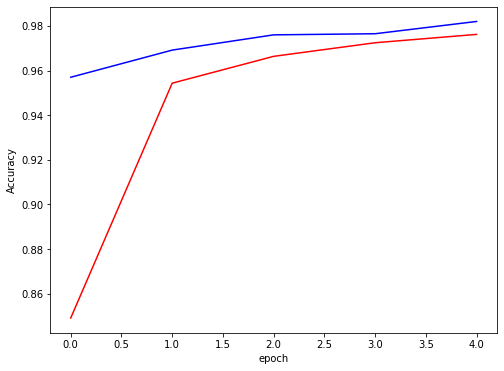

In [36]:
import matplotlib.pyplot as plt

Accuracy = Model_Histroy.history['accuracy']
Val_Accuracy = Model_Histroy.history['val_accuracy']
Epochs = range(5)

plt.figure(figsize = (8,6))
plt.plot(Epochs, Accuracy, c = 'red', label = 'Training accuracy')
plt.plot(Epochs, Val_Accuracy, c = 'blue', label = 'Validation accuracy')

plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [37]:
Model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0565 - accuracy: 0.9818


[0.05648559704422951, 0.9818000197410583]

In [38]:
import pandas as pd
Fashion_MNIST_Train_DF = pd.read_csv('fashion-mnist_train.csv')

In [39]:
Fashion_MNIST_Train_DF.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [40]:
train_X = Fashion_MNIST_Train_DF.iloc[:,1:785].values

In [41]:
train_X.shape

(60000, 784)

In [42]:
train_y = Fashion_MNIST_Train_DF.iloc[:,0].values

In [43]:
train_y

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

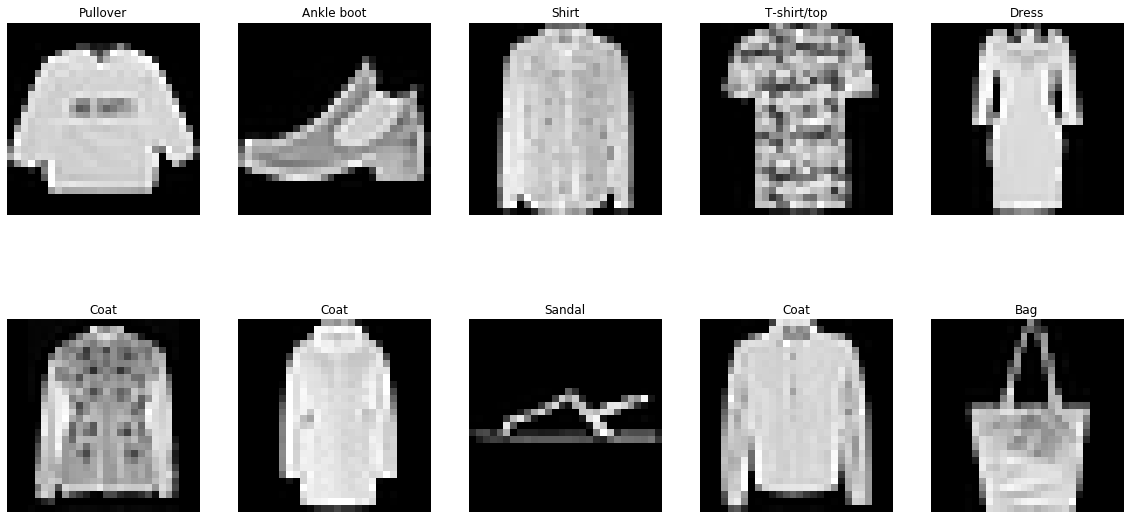

In [44]:
import matplotlib.pyplot as plt
import numpy as np

Feature_name = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt',\
7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

fig, axes = plt.subplots(2,5,figsize = (20,10))
for axe, i in zip(axes.ravel(), np.arange(10)):
    axe.imshow(train_X[i].reshape(28,28), cmap = 'gray')
    axe.set_title(Feature_name[train_y[i]])
    axe.set_axis_off()

In [45]:
import pandas as pd
Fashion_MNIST_Test_DF = pd.read_csv('fashion-mnist_test.csv')

In [46]:
test_X = Fashion_MNIST_Test_DF.iloc[:,1:785].values

In [47]:
test_X.shape

(10000, 784)

In [48]:
test_y = Fashion_MNIST_Test_DF.iloc[:,0].values

In [49]:
test_y.shape

(10000,)

In [50]:
train_X.shape, test_X.shape

((60000, 784), (10000, 784))

In [51]:
X_train = train_X.astype('float')/255
X_test = test_X.astype('float')/255

In [52]:
X_train = X_train.reshape(60000, 28, 28 ,1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [53]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [54]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Model = Sequential()
Model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)))
Model.add(MaxPooling2D(3))
Model.add(Conv2D(32, (3,3), activation = 'relu'))
Model.add(MaxPooling2D(3))
Model.add(Flatten())
Model.add(Dense(32, activation = 'relu'))
Model.add(Dense(10, activation = 'softmax'))

In [56]:
Model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [57]:
Model_Histroy = Model.fit(X_train, y_train, epochs = 5, batch_size = 64, validation_split = 0.1, verbose = 0)

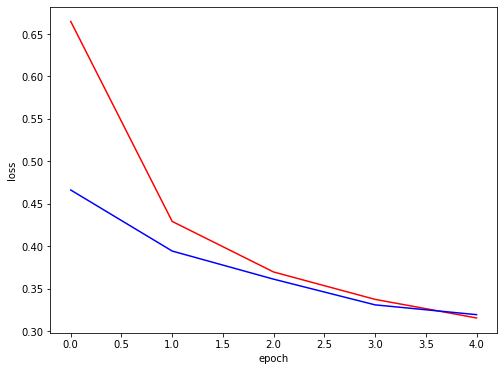

In [58]:
import matplotlib.pyplot as plt

Loss = Model_Histroy.history['loss']
Val_Loss = Model_Histroy.history['val_loss']
Epochs = range(5)

plt.figure(figsize = (8,6))
plt.plot(Epochs, Loss, c = 'red', label = 'Training loss')
plt.plot(Epochs, Val_Loss, c = 'blue', label = 'Validation loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


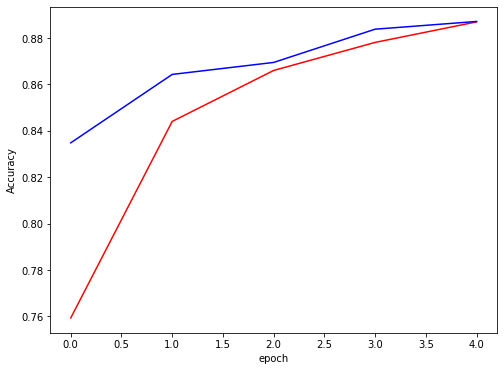

In [59]:
import matplotlib.pyplot as plt

Accuracy = Model_Histroy.history['accuracy']
Val_Accuracy = Model_Histroy.history['val_accuracy']
Epochs = range(5)

plt.figure(figsize = (8,6))
plt.plot(Epochs, Accuracy, c = 'red', label = 'Training accuracy')
plt.plot(Epochs, Val_Accuracy, c = 'blue', label = 'Validation accuracy')

plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [61]:
Model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3075 - accuracy: 0.8932


[0.3074529767036438, 0.8931999802589417]

In [62]:
import os

base_directory = 'D:\TensorFlow_Keras\DogvsCat\Data'
os.listdir(base_directory)

['dog.8011.jpg',
 '._dog.8011.jpg',
 'cat.5077.jpg',
 '._cat.5077.jpg',
 'dog.7322.jpg',
 '._dog.7322.jpg',
 'cat.2718.jpg',
 '._cat.2718.jpg',
 'cat.10151.jpg',
 '._cat.10151.jpg',
 'cat.3406.jpg',
 '._cat.3406.jpg',
 'dog.1753.jpg',
 '._dog.1753.jpg',
 'cat.4369.jpg',
 '._cat.4369.jpg',
 'cat.7660.jpg',
 '._cat.7660.jpg',
 'dog.5535.jpg',
 '._dog.5535.jpg',
 'cat.8553.jpg',
 '._cat.8553.jpg',
 'cat.9895.jpg',
 '._cat.9895.jpg',
 'cat.1211.jpg',
 '._cat.1211.jpg',
 'dog.3144.jpg',
 '._dog.3144.jpg',
 'dog.775.jpg',
 '._dog.775.jpg',
 'dog.11102.jpg',
 '._dog.11102.jpg',
 'cat.6218.jpg',
 '._cat.6218.jpg',
 'dog.11664.jpg',
 '._dog.11664.jpg',
 'dog.3622.jpg',
 '._dog.3622.jpg',
 'cat.1577.jpg',
 '._cat.1577.jpg',
 'cat.12020.jpg',
 '._cat.12020.jpg',
 'dog.5253.jpg',
 '._dog.5253.jpg',
 'cat.7106.jpg',
 '._cat.7106.jpg',
 'cat.8235.jpg',
 '._cat.8235.jpg',
 'cat.952.jpg',
 '._cat.952.jpg',
 'dog.9469.jpg',
 '._dog.9469.jpg',
 'dog.1035.jpg',
 '._dog.1035.jpg',
 'cat.3360.jpg',
 '._cat

In [67]:
import os

base_directory = 'D:\TensorFlow_Keras\DogvsCat\Data'

count = 0
for files in os.listdir(base_directory):
    print(files, type(files), sep = ' ')
    count = count + 1
    if count == 4:
        break


dog.8011.jpg <class 'str'>
._dog.8011.jpg <class 'str'>
cat.5077.jpg <class 'str'>
._cat.5077.jpg <class 'str'>


In [68]:
import os

base_directory = 'D:\TensorFlow_Keras\DogvsCat\Data'

count = 0
for files in os.listdir(base_directory):
    file_split = files.split('.')
    print(file_split, type(file_split), sep = ' ')
    count = count + 1
    if count == 4:
        break


['dog', '8011', 'jpg'] <class 'list'>
['', '_dog', '8011', 'jpg'] <class 'list'>
['cat', '5077', 'jpg'] <class 'list'>
['', '_cat', '5077', 'jpg'] <class 'list'>


In [69]:
import os

base_directory = 'D:\TensorFlow_Keras\DogvsCat\Data'

count = 0
for files in os.listdir(base_directory):
    file_split = files.split('.')
    if file_split[0] == 'dog':
        print('DOG', file_split, type(file_split), sep = ' ')
    if file_split[0] == 'cat':    
        print('CAT', file_split, type(file_split), sep = ' ')
    count = count + 1
    if count == 4:
        break


DOG ['dog', '8011', 'jpg'] <class 'list'>
CAT ['cat', '5077', 'jpg'] <class 'list'>


In [73]:
import os

base_directory = 'D:\TensorFlow_Keras\DogvsCat\Data'

count = 0
for files in os.listdir(base_directory):
    file_split = files.split('.')
    filename = os.path.join(files, base_directory)
    if file_split[0] == 'dog':
        print('DOG', filename, sep = ' ')
    if file_split[0] == 'cat':    
        print('CAT', filename, sep = ' ')
    count = count + 1
    if count == 4:
        break


DOG D:\TensorFlow_Keras\DogvsCat\Data
CAT D:\TensorFlow_Keras\DogvsCat\Data


In [85]:
import os
import cv2

base_directory = 'D:\TensorFlow_Keras\DogvsCat\Data'

count = 0
for files in os.listdir(base_directory):
    file_split = files.split('.')
    filename = os.path.join(base_directory,files)
    if file_split[0] == 'dog':
        image = cv2.imread(filename)
        image_resize = cv2.resize(image, (150, 150), interpolation = cv2.INTER_LINEAR)
        print('DOG', filename, image.shape, image_resize.shape, sep = ' ')
    if file_split[0] == 'cat':   
        image = cv2.imread(filename)
        image_resize = cv2.resize(image, (150, 150), interpolation = cv2.INTER_LINEAR)
        print('CAT', filename, image.shape, image_resize.shape, sep = ' ')
    count = count + 1
    if count == 4:
        break

DOG D:\TensorFlow_Keras\DogvsCat\Data\dog.8011.jpg (500, 380, 3) (150, 150, 3)
CAT D:\TensorFlow_Keras\DogvsCat\Data\cat.5077.jpg (300, 399, 3) (150, 150, 3)


In [80]:
type(image)

NoneType

In [90]:
import os
import cv2

base_directory = 'D:\TensorFlow_Keras\DogvsCat\Data'
X_temp = []
y_temp = []

for files in os.listdir(base_directory):
    file_split = files.split('.')
    filename = os.path.join(base_directory,files)
    if file_split[0] == 'dog':
        image = cv2.imread(filename)
        image_resize = cv2.resize(image, (150, 150), interpolation = cv2.INTER_LINEAR)
        X_temp.append(image_resize)
        y_temp.append(1)
    if file_split[0] == 'cat':   
        image = cv2.imread(filename)
        image_resize = cv2.resize(image, (150, 150), interpolation = cv2.INTER_LINEAR)
        X_temp.append(image_resize)
        y_temp.append(0)

KeyboardInterrupt: 

In [91]:
len(X_temp)

20911

In [93]:
len(y_temp)

20911

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, random_state = 0)

C:\Users\user\Anaconda3\envs\TF20_37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\envs\TF20_37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\envs\TF20_37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\envs\TF20_37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [97]:
from tensorflow.keras.utils import to_categorical
import numpy as np

X_train = np.array(X_train).astype('float')/255
X_test = np.array(X_test).astype('float')/255
y_train01 = to_categorical(y_train) 
y_test01 = to_categorical(y_test) 

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Model = Sequential()
Model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (150,150,3)))
Model.add(MaxPooling2D(3))
Model.add(Conv2D(32, (3,3), activation = 'relu'))
Model.add(MaxPooling2D(3))
Model.add(Flatten())
Model.add(Dense(32, activation = 'relu'))
Model.add(Dense(2, activation = 'softmax'))

In [ ]:
Model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [ ]:
Model.fit(X_train, y_train01, epochs = 5, batch_size = 64, validation_split = 0.1)

In [ ]:
Model.evaluate(X_test, y_test01)